In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/income.csv')

In [ ]:
df.pop('sex')

,sex
0,Male
1,Male
2,Male
3,Male
4,Female
...,...
32556,Female
32557,Male
32558,Female
32559,Male


In [ ]:
df.pop('native-country')

,native-country
0,United-States
1,United-States
2,United-States
3,United-States
4,Cuba
...,...
32556,United-States
32557,United-States
32558,United-States
32559,United-States


In [ ]:
df.pop('race')

,race
0,White
1,White
2,White
3,Black
4,Black
...,...
32556,White
32557,White
32558,White
32559,White


In [ ]:
df.pop('relationship')

,relationship
0,Not-in-family
1,Husband
2,Not-in-family
3,Husband
4,Wife
...,...
32556,Wife
32557,Husband
32558,Unmarried
32559,Own-child


In [ ]:
df

,age,workclass,education,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,2174,0,40,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,0,0,13,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,0,0,40,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,0,0,40,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,0,0,38,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,0,0,40,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,0,0,40,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,0,0,20,0


In [ ]:

# Переводим столбцы с типом данных 'object' в тип данных 'category'
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')

In [ ]:
# Создаем копию данных
category_columns: list[str] = df.select_dtypes(include=['category']).columns # собираем колонки помеченные как objects
df.info()
print(category_columns)


# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)
print(df.columns)
#df.education_9th = df.education_9th.astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      30718 non-null  category
 6   capital-gain    32561 non-null  int64   
 7   capital-loss    32561 non-null  int64   
 8   hours-per-week  32561 non-null  int64   
 9   income >50K     32561 non-null  int64   
dtypes: category(4), int64(6)
memory usage: 1.6 MB
Index(['workclass', 'education', 'marital-status', 'occupation'], dtype='object')
Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income >50K', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0.301370,0.800000,0.021740,0.0,0.397959,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.452055,0.800000,0.000000,0.0,0.122449,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.287671,0.533333,0.000000,0.0,0.397959,0.0,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,0.493151,0.400000,0.000000,0.0,0.397959,0.0,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
4,0.150685,0.800000,0.000000,0.0,0.397959,0.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.000000,0.0,0.377551,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
32557,0.315068,0.533333,0.000000,0.0,0.397959,1.0,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
32558,0.561644,0.533333,0.000000,0.0,0.397959,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
32559,0.068493,0.533333,0.000000,0.0,0.193878,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for col in df.columns:
  if df[col].dtype == 'bool':
    df[col] = df[col].astype('int64')

In [ ]:
! pip install ipywidgets

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output


def interactive_kmeans_visualization(X, max_clusters=10, max_iterations=50):

    # преобразуем X в numpy array
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_kmeans_iteration(X, centroids, labels=None, step=0):
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means Iteration {step}')
        plt.legend()
        plt.show()

    def k_means_interactive(X, k, max_iters):
        np.random.seed(42)
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        for step in range(max_iters):
            # distances = np.sqrt(np.sum((X[:, np.newaxis] - centroids)**2, axis=2))
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X, centroids, labels, step)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X, k, max_iters)

    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

# Берем датасет и визуализируем K-means
interactive_kmeans_visualization(df[:100])

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определяем количество кластеров k
k = 3  # Вы можете изменить это значение в соответствии с вашими данными

# Создаем и обучаем модель KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

# Добавляем метки кластеров в исходный DataFrame
df_k_means = df.copy()
df_k_means['Cluster'] = labels

# Вывод статистики по кластерам для каждого признака
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_k_means.groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if k > 1:
    silhouette_avg = silhouette_score(df, labels)
    print(f"\nКоэффициент силуэта для k={k}: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен для k=1")


Статистика по кластерам:

Статистика для признака 'age':
             mean       std  min  max
Cluster                              
0        0.165575  0.141754  0.0  1.0
1        0.295756  0.197487  0.0  1.0
2        0.360992  0.164616  0.0  1.0

Статистика для признака 'education-num':
             mean       std  min  max
Cluster                              
0        0.596551  0.186909  0.0  1.0
1        0.579746  0.132189  0.0  1.0
2        0.625465  0.181911  0.0  1.0

Статистика для признака 'capital-gain':
             mean       std  min  max
Cluster                              
0        0.004230  0.038015  0.0  1.0
1        0.002735  0.030780  0.0  1.0
2        0.018978  0.100470  0.0  1.0

Статистика для признака 'capital-loss':
             mean       std  min       max
Cluster                                   
0        0.012721  0.072585  0.0  0.845500
1        0.012447  0.074311  0.0  1.000000
2        0.028361  0.109244  0.0  0.689624

Статистика для признака 'hours-pe

#Анализ кластеров
После применения алгоритма K-means с количеством кластеров ( k=3 ), мы получили три группы людей с заметными отличиями по некоторым признакам. Рассмотрим три наиболее значимых признака, по которым кластеры существенно различаются:

1.**age** (возраст):
 **Кластер 1**имеет самый высокий средний возраст (0.407), что заметно выше, чем в других кластерах. Это означает, что в основном кластер 1 состоит из людей старшего возраста.

**Кластер 0** имеет самый низкий средний возраст (0.234). Это указывает на то, что в основном кластер 0 состоит из людей более молодого возраста.

**Кластер 2** имеет средний возраст (0.334), который находится между кластерами 0 и 1.

**2.hour-per-week**(количество часов в неделю)

Среднее количество часов в неделю (mean):

**Кластеры 1 и 2** имеют очень схожее среднее количество часов в неделю (около 0.432), что заметно выше, чем у кластера 0. Это говорит о том, что люди в кластерах 1 и 2 в среднем тратят больше времени на какую-то деятельность (например, на работу), чем люди в кластере 0.

**Кластер 0** имеет более низкое среднее количество часов в неделю (0.374), что говорит о том, что в среднем люди в этом кластере менее заняты, или возможно работают меньшее количество часов.

**3.education-num**
Средний уровень образования (mean):

**Кластер 1**имеет самый высокий средний уровень образования (0.652), что заметно выше, чем у других кластеров. Это говорит о том, что люди в этом кластере в среднем имеют более высокий уровень образования.

**Кластер 0**имеет самый низкий средний уровень образования (0.588). Это указывает на то, что в среднем люди в этом кластере имеют более низкий уровень образования, по сравнению с остальными.

**Кластер 2** имеет средний уровень образования (0.608), который находится между кластерами 0 и 1.

**Коэффициент силуэта для ( k=3 ): 0.1017**


Коэффициент силуэта — это метрика для оценки качества кластеризации, показывающая, насколько объекты внутри одного кластера похожи друг на друга и отличаются от объектов в других кластерах.


Диапазон значений: от -1 до 1.
Близкие к 1: Хорошая кластеризация; объекты внутри кластеров схожи, кластеры хорошо разделены.
Около 0: Кластеры пересекаются; объекты находятся на границах кластеров.
Отрицательные значения: Плохая кластеризация; объекты могут быть отнесены к неправильным кластерам.
Интерпретация полученного значения:

**0.1017**— это положительное значение, указывающее на удовлетворительное качество кластеризации.
Кластеры достаточно хорошо разделены, но есть пересечение между ними.
Кластеризация позволила выделить группы вин, отличающиеся по типу (белое или красное), содержанию алкоголя и уровню остаточного сахара.

#DBSSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, основанный на плотности точек в пространстве.

Параметры алгоритма:

Epsilon (eps): радиус окрестности точки.

Min_samples: минимальное количество точек в eps-окрестности для того, чтобы точка считалась ядром кластера.

Классификация точек:

Core point (ядро): если в eps-окрестности точки находится не менее min_samples точек, то она является ядром.

Border point (граничная точка): точка, которая находится в eps-окрестности ядра, но сама не является ядром.

Noise point (шум): точка, которая не является ни ядром, ни граничной точкой. (входит в кластер -1)
Точки, которые связаны по плотности (через ядра и их eps-окрестности), объединяются в один кластер.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def interactive_dbscan_visualization(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для настройки параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                                       value='euclidean', description='metric:')

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider, 'metric': metric_dropdown})
    display(ui, out)

# Пример использования
interactive_dbscan_visualization(df[:120])

Output()

#DBSSCAN через sklearn


Количество кластеров: 911
Статистика по кластерам:

Статистика для признака 'age':
             mean       std       min       max  count
Cluster                                               
0        0.205479  0.105169  0.068493  0.369863     18
1        0.389954  0.159539  0.109589  0.780822     30
2        0.293203  0.147071  0.068493  0.780822     52
3        0.237235  0.166779  0.013699  0.657534     22
4        0.270297  0.155943  0.082192  0.767123    123
...           ...       ...       ...       ...    ...
906      0.271689  0.101561  0.095890  0.369863      6
907      0.380822  0.180542  0.082192  0.561644      5
908      0.213699  0.182916  0.041096  0.479452      5
909      0.230137  0.287247  0.000000  0.698630      5
910      0.635616  0.226877  0.301370  0.890411      5

[911 rows x 5 columns]

Статистика для признака 'education-num':
             mean  std       min       max  count
Cluster                                          
0        0.800000  0.0  0.800000  0.

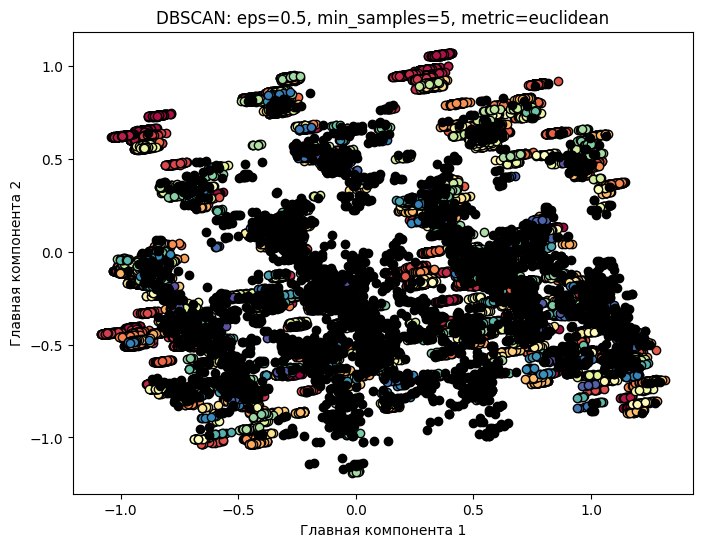

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 0.5
min_samples = 5
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(df)

# Добавляем метки кластеров в DataFrame
df_dbscan = df.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(df[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()


In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# Кластеризация K-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

# Индекс Калински-Харабаза
ch_score_kmeans = calinski_harabasz_score(df, labels_kmeans)
print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# Индекс Дэвиса-Болдина
db_score_kmeans = davies_bouldin_score(df, labels_kmeans)
print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# Коэффициент силуэта
sh_score_kmeans = silhouette_score(df, labels_kmeans)
print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")

Индекс Калински-Харабаза для K-means: 3603.5207
Индекс Дэвиса-Болдина для K-means: 2.9558
Коэффициент силуэта для K-means: 0.1017


In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")


Индекс Калински-Харабаза для DBSCAN: 2084.5188
Индекс Дэвиса-Болдина для DBSCAN: 0.3497
Коэффициент силуэта для DBSCAN: 0.7742


Чем выше значение индекса Калински-Харабаза, тем лучше. Большое значение означает, что кластеры хорошо разделены, и точки внутри каждого кластера находятся близко друг к другу.

Индекс Дэвиса-Болдина для DBSCAN этот индекс измеряет среднюю “похожесть” каждого кластера на другие кластеры. Чем меньше эта похожесть, тем лучше.

. Коэффициент силуэта (Silhouette Coefficient)

Суть: Этот коэффициент измеряет, насколько каждая точка “похожа” на точки своего кластера, и насколько она “отличается” от точек других кластеров.

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")

Индекс Калински-Харабаза для DBSCAN: 2084.5188
Индекс Дэвиса-Болдина для DBSCAN: 0.3497
Коэффициент силуэта для DBSCAN: 0.7742


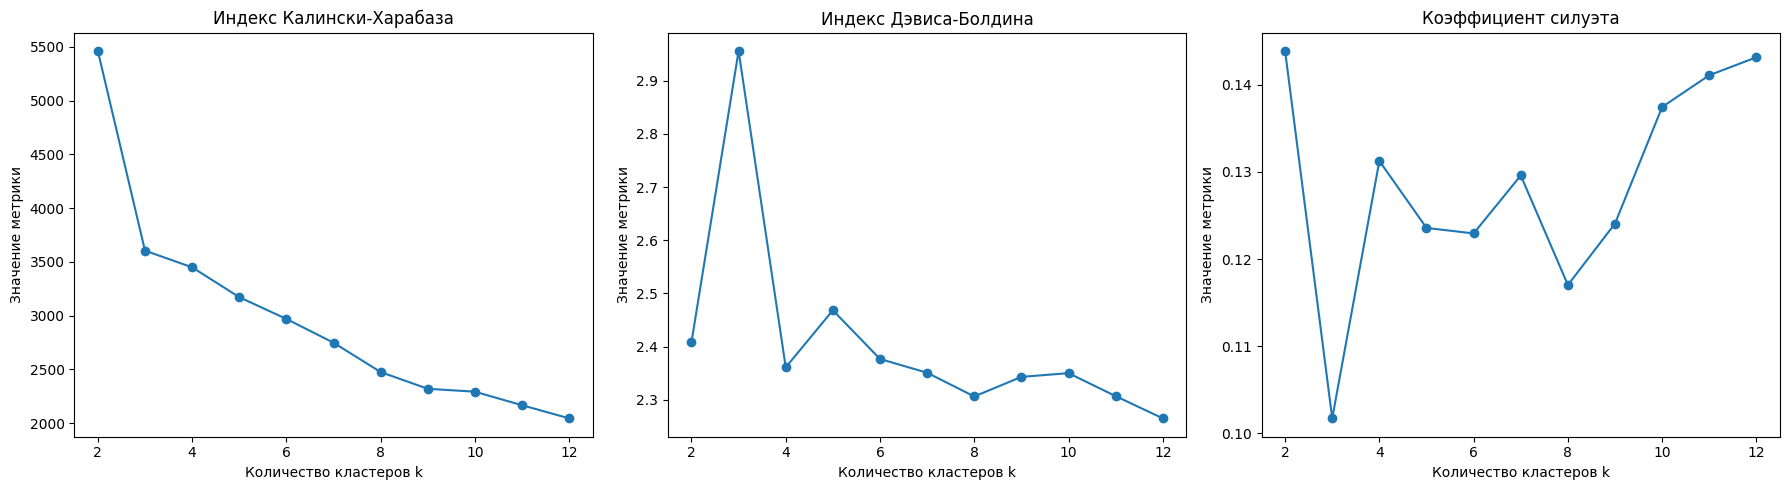

In [ ]:
# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(df, labels)
    db_score = davies_bouldin_score(df, labels)
    silhouette_avg = silhouette_score(df, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()

In [ ]:
!pip install pymorphy2

In [ ]:

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pymorphy2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Инициализация текстовых анализаторов

In [ ]:
!pip install --upgrade pip

In [ ]:
pip install pymorphy3

In [ ]:
import pymorphy3
from nltk.corpus import stopwords
import chardet

morph = pymorphy3.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        raw_data = f.read()
        result = chardet.detect(raw_data)
        return result['encoding']

file_path = '/content/start.txt'
encoding = detect_encoding(file_path)

with open(file_path, 'r', encoding=encoding) as f:
    content = f.read()

content = content.replace('\x14', ' ')
content = content.replace('\x15', ' ')

articles_raw = content.split('x x x ')
titles = []
texts = []

for article in articles_raw:
    lines = article.strip().split('\n')
    if len(lines) >= 2:
        # Извлекаем заголовок и текст статьи
        title = lines[0]
        text = ' '.join(lines[1:])
        titles.append(title)
        texts.append(text)

In [ ]:
texts

['  ----------------------------------------------------------------------------  ББК 84(0)5-5  А76  Аполлинер Г. Алкоголи.  СПб.: Терция, Кристалл, 1999. - (Б-ка мировой лит. Малая серия).  OCR Бычков М.Н. mailto:bmn@lib.ru ----------------------------------------------------------------------------',
 ' Мертва А помнишь нашу встречу  Она воскреснет погоди  И побежит к тебе навстречу   Опять опять уходит май  Случалось он со мной был нежен  Май не догнать тебе прощай  Вернешься будешь так же нежен   Перевод Э. Линецкой',
 ' Где сонм чужих страстей клубится  Твое воспоминанье как  К цепи прикованная птица   О руки памятью упорной  Вы скованы вас пламя жжет  Воспоминанье феникс черный  Нас на своем насесте ждет   Цепь незаметно перетрется  И феникс взмоет к облакам  О как над нами он смеется  Дай мне припасть к твоим ногам   Перевод М. Яснова',
 ' Все ближе вскрики карнавала  Но жаль как жаль обоим нам  Что соучастия не стало   Качнулась роза на волне  Промчались маски птичья стайка  Сл

In [ ]:
titles[:2]

['Гийом Аполлинер. Vitam impendere amori (1917) ',
 'Не прижимай любовь к груди']

#Предварительная обработка текстовых данных
преобразуем в lowercase

оставляем только слова

токенизируем текста

преобразуем слова в начальную форму

In [ ]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [ ]:
def preprocess_text(text):
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем пунктуацию и цифры
    text = re.sub(r'[^а-яё\s]', '', text)
    # Токенизация
    words = text.split()
    # Удаление стоп-слов и лемматизация
    lemmatized = []
    for word in words:
        if word not in russian_stopwords:
            lemma = morph.parse(word)[0].normal_form
            lemmatized.append(lemma)
    return ' '.join(lemmatized)

# Применяем предобработку к каждому тексту
texts_preprocessed = [preprocess_text(text) for text in texts]

In [ ]:
texts_preprocessed

['ббк аполлинер г алкоголь спб терция кристалл бка мировой лита малый серия бычков мн',
 'мёртвый помнить наш встреча воскреснуть погодить побежать ты навстречу уходить май случаться я нежный май догнать ты прощать вернуться быть нежный перевод э линецкий',
 'сонм чужой страсть клубиться твой воспоминание цепь приковать птица рука память упорный сковать пламя жечь воспоминание феникс чёрный свой насест ждать цепь незаметно перетереться феникс взмыть облако мы смеяться дать припасть твой нога перевод м яснова',
 'близкий вскрик карнавал жаль жаль оба мы соучастие стать качнуться роза волна промчаться маска птичий стайка слово бренчать бренчать клянчить попрошайка перевод э линецкий',
 'рассказчица простоволосый пугливо россказни плести ночь рассыпать коса ребёнок ребёнок тёмный сад исчезнуть ваш крыло стая терять роза аромат смерть защищать перо цвет коса час мелкий кража тихнуть чёрный пора любимец роза фонтан сорвать корень перевод м яснова',
 'тонуть твой глаз солдат проходить отверн

#Преобразуем в векторный вид

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts_preprocessed)

In [ ]:

# Параметры DBSCAN могут требовать подбора
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
labels = dbscan.fit_predict(X)

In [ ]:

# Создаем DataFrame с заголовками и метками кластеров
df = pd.DataFrame({'title': titles, 'label': labels})
df = df.drop_duplicates()
# Выводим количество кластеров
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
print(f'Количество кластеров: {n_clusters}')

# Анализируем кластеры
for label in unique_labels:
    if label == -1:
        continue  # Пропускаем шум
    cluster_titles = df[df['label'] == label]['title'].head(3)
    print(f'\nКластер {label}:')
    for title in cluster_titles:
        print(f'- {title}')

Количество кластеров: 0


In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Применяем PCA для уменьшения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Создаем DataFrame для визуализации
df_plot = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'title': titles,
    'label': labels
})

# Создаем 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_plot['PC1'],
    y=df_plot['PC2'],
    z=df_plot['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_plot['label'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=df_plot['title'],
    hovertemplate='%{text}'
)])

# Настраиваем внешний вид графика
fig.update_layout(
    title='3D PCA визуализация статей',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Генерируем кадры для анимации вращения графика
frames = []
for angle in range(0, 360, 10):
    camera = dict(
        eye=dict(x=2*np.cos(np.radians(angle)), y=2*np.sin(np.radians(angle)), z=1.5)
    )
    frames.append(go.Frame(layout=dict(scene_camera=camera)))

# Добавляем кадры в график
fig.frames = frames

# Добавляем кнопки управления анимацией
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=0.8,
        x=1.05,
        xanchor='left',
        yanchor='top',
        buttons=[dict(label='Вращать',
                      method='animate',
                      args=[None, dict(frame=dict(duration=50, redraw=True),
                                       transition=dict(duration=0),
                                       fromcurrent=True,
                                       mode='immediate')])]
    )]
)

# Отображаем график
fig.show()